<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Derivation for simple linear regression


---

To minimize the residual sum of squares, we will have to calculate its partial derivatives with respect to $\beta_0$ and $\beta_1$ respectively and set each of them to zero.

To calculate the partial derivatives, we can use python's `sympy` package:

In [1]:
import sympy as sym
from sympy import init_session, init_printing

init_printing()
sym.symbols('x x_i y_i beta_0 beta_1 n')

### Sympy readily calculates derivatives of functions which might cost you some fatigue to do by hand.

In [2]:
sym.diff('x**2','x')

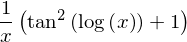

In [3]:
sym.diff('tan(log(x))','x')

### We want to minimize the residual sum of squares:

$$RSS = \sum_{i=1}^n(y_i-(\beta_0+\beta_1 x_i))^2$$

### We do this by taking derivatives with respect to the beta-coefficients. These have the same form for each term in the sum:

In [4]:
print('Partial derivative with respect to beta_0:')
sym.together(sym.diff('(y_i-(beta_0+beta_1*x_i))**2','beta_0'))

Partial derivative with respect to beta_0:


In [5]:
print('Partial derivative with respect to beta_1:')
sym.together(sym.diff('(y_i-(beta_0+beta_1*x_i))**2','beta_1'))

Partial derivative with respect to beta_1:


### The partial derivative with respect to $\beta_0$:

$$\frac{\partial RSS}{\partial\beta_0} = -2\sum_{i=1}^n{\left(y_i - (\beta_0 + \beta_1x_i)\right)}$$

### The partial derivative with respect to $\beta_1$:

$$\frac{\partial RSS}{\partial\beta_1} = -2\sum_{i=1}^n{x_i\left(y_i - (\beta_0 + \beta_1x_i)\right)}$$

### To find the minimum, we set each of these derivatives to zero.

#### For the first equation, we obtain

$$
\begin{eqnarray*}
0 &=& \sum_{i=1}^n{\left(y_i - (\beta_0 + \beta_1x_i)\right)}\\
0 &=& \sum_{i=1}^n y_i - \sum_{i=1}^n \beta_0 -\sum_{i=1}^n \beta_1 x_i\\
0 &=& \sum_{i=1}^n y_i - \beta_0\sum_{i=1}^n 1  -\beta_1\sum_{i=1}^n x_i\\
0 &=& n\, \bar{y} - n\, \beta_0 - n \,\beta_1 \bar{x}\\
0 &=& n\left( \bar{y} - \beta_0 - \beta_1 \bar{x}\right)\\
0 &=& \bar{y} - \beta_0 - \beta_1 \bar{x}
\end{eqnarray*}
$$

and hence

$$
\beta_0 = \bar{y} - \beta_1\bar{x}
$$

#### Inserting this result into the equation for  $$\frac{\partial RSS}{\partial\beta_1}$$ gives

$$
\begin{eqnarray*}
0 &=& \sum_{i=1}^n x_i\left(y_i-\bar{y}+\beta_1 \bar{x}- \beta_1 x_i\right)\\
0 &=& \sum_{i=1}^n x_i y_i-\sum_{i=1}^n x_i\bar{y}+\sum_{i=1}^n\beta_1 x_i\bar{x}-\sum_{i=1}^n \beta_1 x_i^2 \\
0 &=& \sum_{i=1}^n x_i y_i -\bar{y}\sum_{i=1}^n x_i 
+ \beta_1\left(\bar{x}\sum_{i=1}^n x_i-\sum_{i=1}^n x_i^2\right)\\
0 &=& n\,\overline{x y}-n\,\bar{x}\bar{y}+\beta_1(n\,\bar{x}^2-n\,\overline{x^2})\\
0 &=& n\left(\overline{x y}-\bar{x}\bar{y}+\beta_1(\bar{x}^2-\overline{x^2})\right)\\
0 &=& \overline{x y}-\bar{x}\bar{y}+\beta_1(\bar{x}^2-\overline{x^2})
\end{eqnarray*}
$$

which gives 

$$
\beta_1 = \frac{\overline{x y}-\bar{x}\bar{y}}{\overline{x^2}-\bar{x}^2}
$$

### Further conclusions 

In the above calculations we obtained the model coefficients. The two partial derivatives allow us to take two further conclusions.

Remember that the residuals are given by

$$\epsilon_i=y_i - (\beta_0 + \beta_1x_i)$$

Hence we can write the partial derivative with respect to $\beta_0$ as

$$\frac{\partial RSS}{\partial\beta_0} = -2\sum_{i=1}^n{\left(y_i - (\beta_0 + \beta_1x_i)\right)} 
= -2\sum_{i=1}^n{\epsilon_i}  =0 $$

This implies that **the sum of the residuals equals zero, and therefore also their mean is zero**.

The partial derivative with respect to $\beta_1$ we can write as

$$\frac{\partial RSS}{\partial\beta_1} = -2\sum_{i=1}^n{x_i\left(y_i - (\beta_0 + \beta_1x_i)\right)} = -2\sum_{i=1}^n{x_i\epsilon_i} = 0$$

This implies that **the scalar product between the vectors of $X$ and $\epsilon$ is zero**, they are orthogonal to each other.